<a href="https://colab.research.google.com/github/kaotickreeations/Oeson-Projects/blob/main/EDA_of_Viral_Social_Media_Posts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

About Dataset
This dataset captures the pulse of viral social media trends across TikTok, Instagram, Twitter, and YouTube. It provides insights into the most popular hashtags, content types, and user engagement levels, offering a comprehensive view of how trends unfold across platforms. With regional data and influencer-driven content, this dataset is perfect for:

Trend analysis 🔍
Sentiment modeling 💭
Understanding influencer marketing 📈
Dive in to explore what makes content go viral, the behaviors that drive engagement, and how trends evolve on a global scale! 🌍
About this file

Suggest Edits
📂 File Description
Viral_Social_Media_Trends.csv
This file contains 5,000 records of viral social media posts across TikTok, Instagram, Twitter, and YouTube. It includes key engagement metrics such as views, likes, shares, and comments, along with trending hashtags and content types.

🔹 Key Features:
Covers multiple social media platforms 📱
Includes trending hashtags and content types 🔥
Provides engagement metrics for data-driven insights 📊
Useful for data visualization, sentiment analysis, and trend prediction 🚀
🏷️ Column Descriptions
Column Name	Description
Post_ID	Unique identifier for each social media post
Platform	Social media platform (TikTok, Instagram, Twitter, YouTube)
Hashtag	Trending hashtag associated with the post
Content_Type	Type of content (Reel, Video, Post, Shorts, Tweet, etc.)
Region	Country where the post gained traction
Views	Total number of views received
Likes	Number of likes on the post ❤️
Shares	Number of times the post was shared 🔄
Comments	Number of comments on the post 💬
Engagement_Level	Engagement classification: Low, Medium, or High 📊
🔹 This dataset helps analyze social media trends, audience engagement, and platform-specific performance for data science & marketing research! 🚀

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load the CSV file into a DataFrame
data = pd.read_csv("Viral_Social_Media_Trends.csv")

# Quick glance at the dataset
print(data.head())


  Post_ID   Platform     Hashtag Content_Type     Region    Views   Likes  \
0  Post_1     TikTok  #Challenge        Video         UK  4163464  339431   
1  Post_2  Instagram  #Education       Shorts      India  4155940  215240   
2  Post_3    Twitter  #Challenge        Video     Brazil  3666211  327143   
3  Post_4    YouTube  #Education       Shorts  Australia   917951  127125   
4  Post_5     TikTok      #Dance         Post     Brazil    64866  171361   

   Shares  Comments Engagement_Level  
0   53135     19346             High  
1   65860     27239           Medium  
2   39423     36223           Medium  
3   11687     36806              Low  
4   69581      6376           Medium  


In [4]:
# Check for basic information
print(data.info())

# Check for missing values
print(data.isnull().sum())

# Statistical summary of numerical columns
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Post_ID           5000 non-null   object
 1   Platform          5000 non-null   object
 2   Hashtag           5000 non-null   object
 3   Content_Type      5000 non-null   object
 4   Region            5000 non-null   object
 5   Views             5000 non-null   int64 
 6   Likes             5000 non-null   int64 
 7   Shares            5000 non-null   int64 
 8   Comments          5000 non-null   int64 
 9   Engagement_Level  5000 non-null   object
dtypes: int64(4), object(6)
memory usage: 390.8+ KB
None
Post_ID             0
Platform            0
Hashtag             0
Content_Type        0
Region              0
Views               0
Likes               0
Shares              0
Comments            0
Engagement_Level    0
dtype: int64
              Views          Likes        Shares   

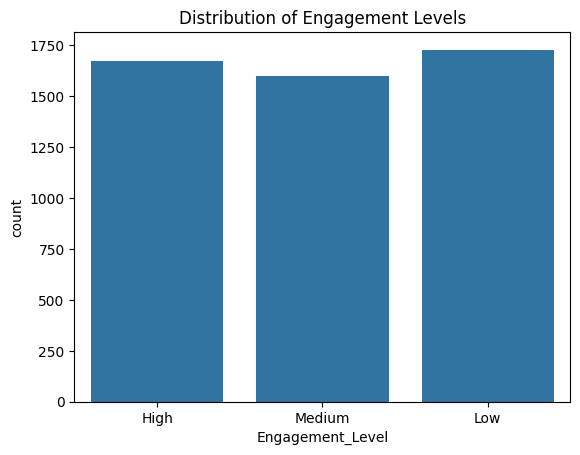

In [5]:
sns.countplot(data=data, x="Engagement_Level")
plt.title("Distribution of Engagement Levels")
plt.show()


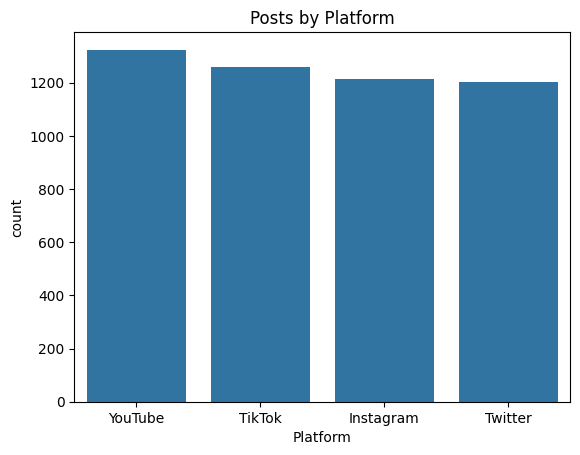

In [6]:
sns.countplot(data=data, x="Platform", order=data['Platform'].value_counts().index)
plt.title("Posts by Platform")
plt.show()

# Most posts seen on youtube

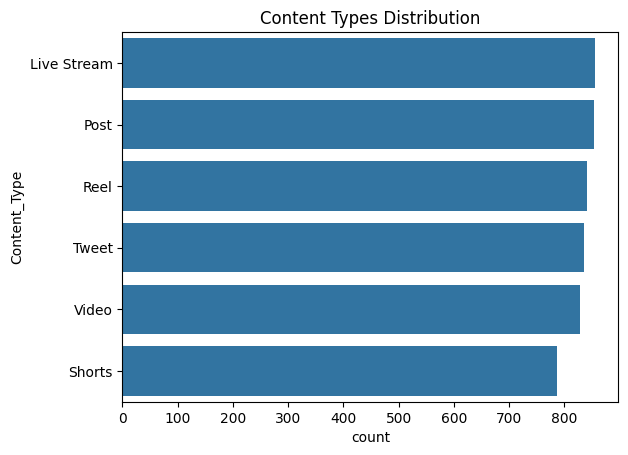

In [7]:
sns.countplot(data=data, y="Content_Type", order=data['Content_Type'].value_counts().index)
plt.title("Content Types Distribution")
plt.show()

#Livestreams and Posts are the biggest content type


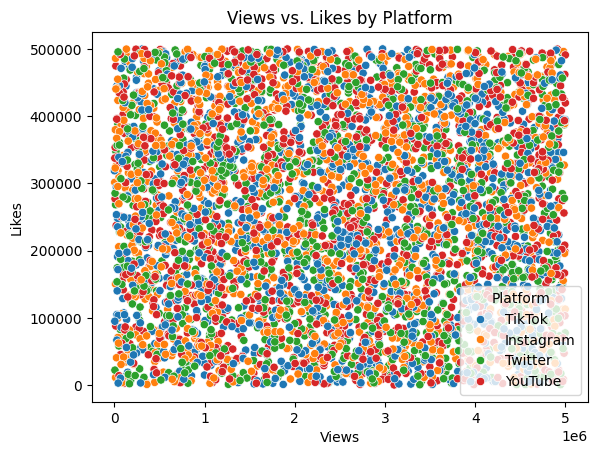

In [8]:
sns.scatterplot(data=data, x="Views", y="Likes", hue="Platform")
plt.title("Views vs. Likes by Platform")
plt.show()


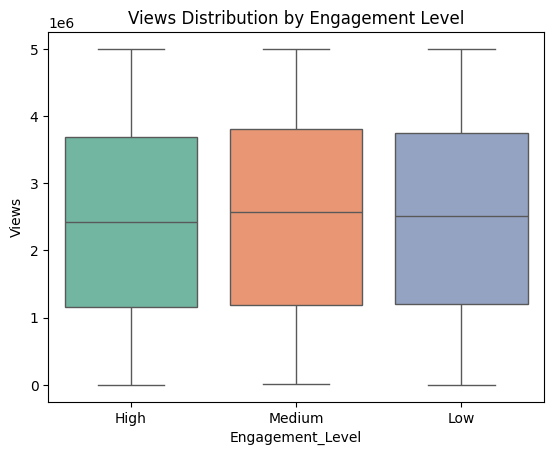

In [18]:
sns.boxplot(data=data, x="Engagement_Level", y="Views", palette="Set2")
plt.title("Views Distribution by Engagement Level")
plt.show()


In [19]:
import warnings
warnings.filterwarnings('ignore')


In [21]:
# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Check the numeric columns
print(numeric_data.head())




     Views   Likes  Shares  Comments
0  4163464  339431   53135     19346
1  4155940  215240   65860     27239
2  3666211  327143   39423     36223
3   917951  127125   11687     36806
4    64866  171361   69581      6376


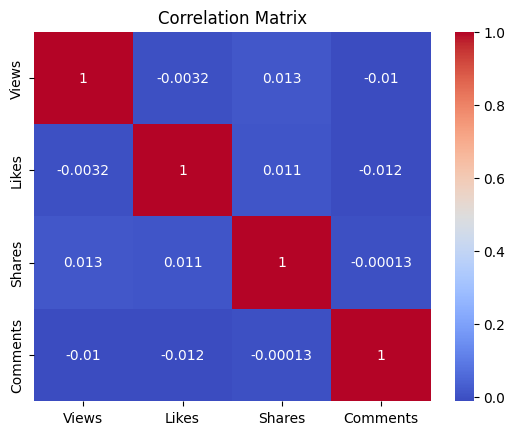

In [22]:
# Generate the correlation matrix
correlation_matrix = numeric_data.corr()

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

#

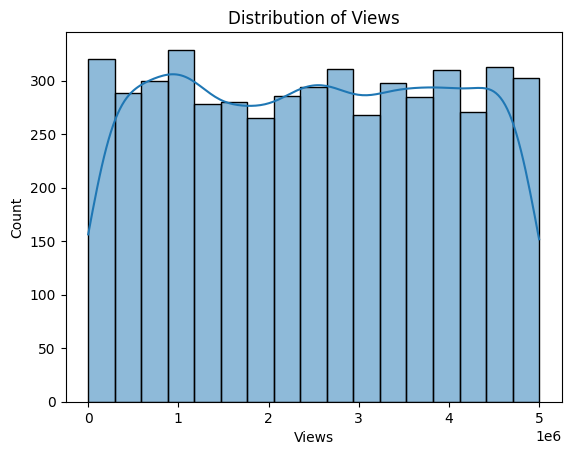

In [23]:
sns.histplot(data['Views'], kde=True)
plt.title("Distribution of Views")
plt.show()


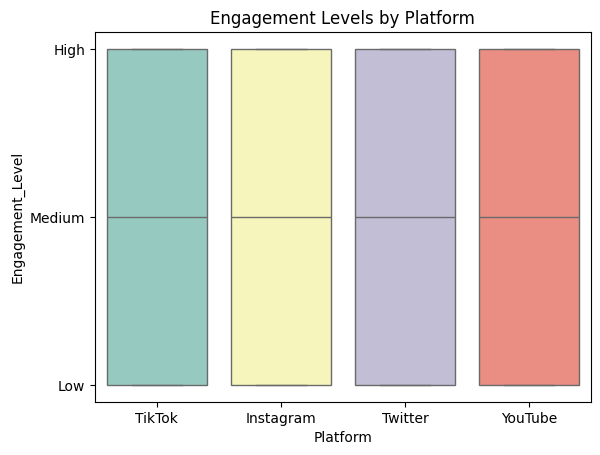

In [24]:
sns.boxplot(data=data, x="Platform", y="Engagement_Level", palette="Set3")
plt.title("Engagement Levels by Platform")
plt.show()


In [25]:
top_hashtags = data['Hashtag'].value_counts().head(10)
print(top_hashtags)

#Fitness has the most hashtags


Hashtag
#Fitness      536
#Education    525
#Challenge    507
#Comedy       505
#Dance        496
#Music        493
#Tech         491
#Fashion      487
#Viral        481
#Gaming       479
Name: count, dtype: int64


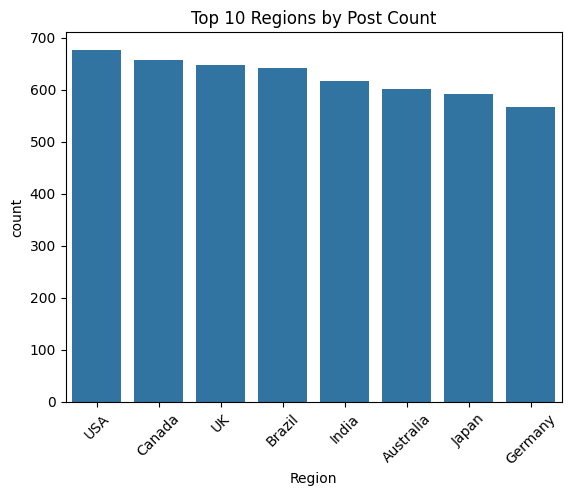

In [26]:
sns.countplot(data=data, x="Region", order=data['Region'].value_counts().index[:10])
plt.title("Top 10 Regions by Post Count")
plt.xticks(rotation=45)
plt.show()

# USA Posts the most on social media platforms


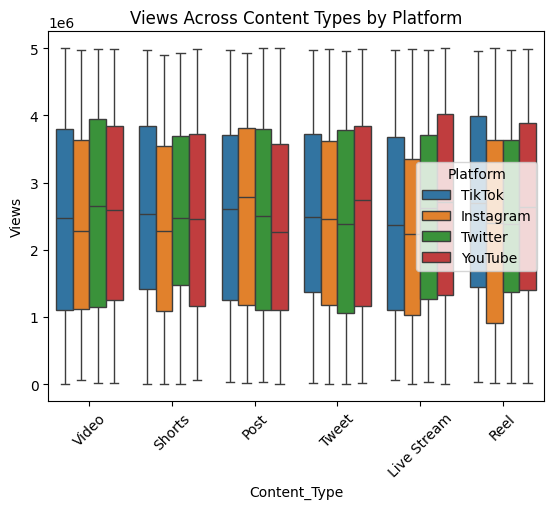

In [29]:
sns.boxplot(data=data, x="Content_Type", y="Views", hue="Platform")
plt.title("Views Across Content Types by Platform")
plt.xticks(rotation=45)
plt.show()


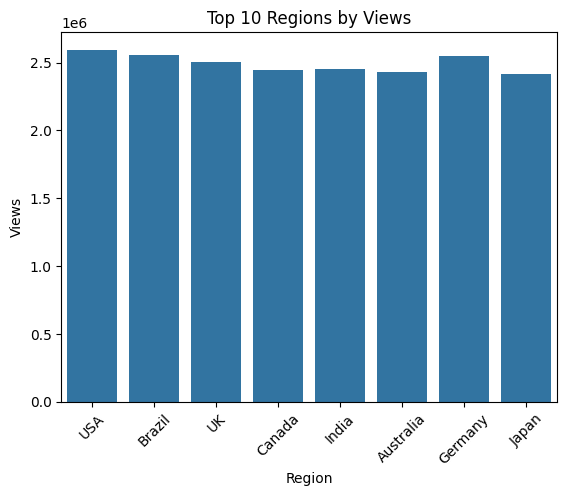

In [30]:
sns.barplot(data=data, x="Region", y="Views", ci=None, order=data.groupby('Region')['Views'].sum().sort_values(ascending=False).index[:10])
plt.title("Top 10 Regions by Views")
plt.xticks(rotation=45)
plt.show()

# USA is top region for views, closely followed by Brazil and Germany
